In [1]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv("D:\Thesis\BIG DATA\Database Churn\joy work\Telecom_customer churn (100000).csv")

In [2]:
num_df = df.select_dtypes(include=['float64', 'int64']).copy()
cat_df = df.select_dtypes(include=['object']).copy()

# Categorical boolean mask
categorical_feature_mask = cat_df.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = cat_df.columns[categorical_feature_mask].tolist()

import numpy as np
#conData=np.log(0.00001 + 1)
conData=0
cat_df=cat_df.fillna(conData)
num_df=num_df.fillna(conData)
cat_df=cat_df.astype(str)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_df[categorical_cols] = cat_df[categorical_cols].apply(lambda col: le.fit_transform(col))

#cat_df[categorical_cols].head(10)

change_mou=num_df['change_mou']
change_rev=num_df['change_rev']
num_df=num_df.drop(['change_mou'], axis=1)
num_df=num_df.drop(['change_rev'], axis=1)

num_df=num_df.drop(['Customer_ID'], axis=1)

churn=num_df['churn']
num_df=num_df.drop(['churn'], axis=1)

#no convertion

num_df=num_df.fillna(conData)

num_df[num_df < 0]=0

result_df = pd.concat([num_df, cat_df], axis=1)
np.nan_to_num(result_df)

result_df_op=result_df
#result_df_op=result_df_op.drop(['churn'], axis=1)
#result_df_op=np.nan_to_num(result_df_op)

X=result_df_op
#y=result_df['churn'] 
y=churn

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.0, random_state=42)

In [5]:
X_train.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,drop_vce_Mean,...,infobase,HHstatin,dwllsize,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd
75721,43.5650,695.75,44.9900,0.0,24.50,8.5750,8.5750,0.0,0.00,5.333333,...,1,3,1,6,1,1,1,1,1,2
80184,77.8025,1839.75,84.9900,0.0,11.25,2.8125,2.8125,0.0,0.00,51.000000,...,1,0,0,10,1,1,1,1,1,1
19864,35.4500,78.25,29.9900,0.0,0.00,0.0000,0.0000,0.0,2.21,3.666667,...,1,0,1,4,1,1,1,1,1,2
76699,34.9900,30.00,44.9900,0.0,0.00,0.0000,0.0000,0.0,0.00,0.000000,...,1,2,1,14,1,1,1,1,1,1
92991,32.2875,204.00,7.9975,0.0,4.25,1.7000,1.7000,0.0,0.00,26.000000,...,1,4,1,6,1,1,1,1,1,2


In [12]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier
classifier = GaussianNB()

classifier.fit(X_train,y_train)

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred  = cross_val_predict(estimator = classifier, X = X_train, y = y_train, cv = 10)
tn, fp, fn, tp  = confusion_matrix(y_train, y_pred).ravel()
print(tn, fp, fn, tp)
pod=tp/(tp+fn)

print('pod: ',pod)
pof=fp/(fp+tn)
print ('pof: ',pof)
auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

from sklearn.model_selection import cross_val_score
roc_auc = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10,  scoring='roc_auc')
print('roc_auc: ',roc_auc.mean())

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_train, y_pred)
auc = auc(fpr, tpr)
print('auc: ',auc)

8669 41769 6931 42631
pod:  0.860154957427061
pof:  0.8281256195725445
AUC:  0.5160146689272582
roc_auc:  0.5630052989047692
auc:  0.5160146689272583


In [4]:
# KNN
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train) 

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred  = cross_val_predict(estimator = classifier, X = X_train, y = y_train, cv = 10)
tn, fp, fn, tp  = confusion_matrix(y_train, y_pred).ravel()
print(tn, fp, fn, tp)
pod=tp/(tp+fn)

print('pod: ',pod)
pof=fp/(fp+tn)
print ('pof: ',pof)
auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)


#from sklearn.model_selection import cross_val_score
#roc_auc = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10,  scoring='roc_auc')
#print('roc_auc: ',roc_auc.mean())

#from sklearn.metrics import roc_curve, auc
#fpr, tpr, thresholds = roc_curve(y_train, y_pred)
#auc = auc(fpr, tpr)
#print('auc: ',auc)

28292 22146 23977 25585
pod:  0.5162221056454542
pof:  0.43907371426305564
AUC:  0.5385741956911992


In [3]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
classifier =RandomForestClassifier(n_estimators=100,max_depth=2,random_state=0)
classifier.fit(X_train, y_train) 
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred  = cross_val_predict(estimator = classifier, X = X_train, y = y_train, cv = 10)
tn, fp, fn, tp  = confusion_matrix(y_train, y_pred).ravel()
print(tn, fp, fn, tp)
pod=tp/(tp+fn)

print('pod: ',pod)
pof=fp/(fp+tn)
print ('pof: ',pof)
auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

#from sklearn.model_selection import cross_val_score
#roc_auc = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10,  scoring='roc_auc')
#print('roc_auc: ',roc_auc.mean())

#from sklearn.metrics import roc_curve, auc
#fpr, tpr, thresholds = roc_curve(y_train, y_pred)
#auc = auc(fpr, tpr)
#print('auc: ',auc)

28297 22141 19940 29622
pod:  0.5976756385940841
pof:  0.43897458265593403
AUC:  0.5793505279690749


auc:  0.579350527969075


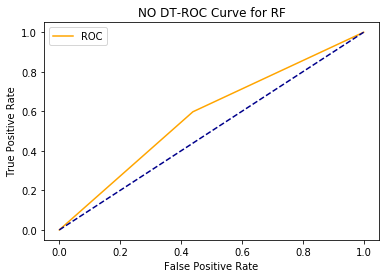

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_train, y_pred)
auc = auc(fpr, tpr)
print('auc: ',auc)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('NO DT-ROC Curve for RF')
plt.legend()
plt.show()

In [6]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
classifier = LogisticRegression()
classifier.fit(X_train, y_train) 

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred  = cross_val_predict(estimator = classifier, X = X_train, y = y_train, cv = 10)
tn, fp, fn, tp  = confusion_matrix(y_train, y_pred).ravel()
print(tn, fp, fn, tp)
pod=tp/(tp+fn)

print('pod: ',pod)
pof=fp/(fp+tn)
print ('pof: ',pof)
auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

#from sklearn.model_selection import cross_val_score
#roc_auc = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10,  scoring='roc_auc')
#print('roc_auc: ',roc_auc.mean())

#from sklearn.metrics import roc_curve, auc
#fpr, tpr, thresholds = roc_curve(y_train, y_pred)
#auc = auc(fpr, tpr)
#print('auc: ',auc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

30114 20324 20552 29010
pod:  0.5853274686251564
pof:  0.40295015662793926
AUC:  0.5911886559986086


In [ ]:
#SVM
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred  = cross_val_predict(estimator = classifier, X = X_train, y = y_train, cv = 10)
tn, fp, fn, tp  = confusion_matrix(y_train, y_pred).ravel()
print(tn, fp, fn, tp)
pod=tp/(tp+fn)

print('pod: ',pod)
pof=fp/(fp+tn)
print ('pof: ',pof)
auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [9]:
#FNN
def get_FNN_Predict(X2_train, X2_test, y2_train, y2_test):
    from keras.models import Sequential
    from keras.layers import Dense
    #create model
    model = Sequential()
    #get number of columns in training data
    n_cols = X2_train.shape[1]
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(500, activation='relu'))
    model.add(Dense(500, activation='relu'))
    model.add(Dense(500, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    #compile model using mse as a measure of model performance
    #model.compile(optimizer='adam', loss='mean_squared_error')
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    #model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  
    from keras.callbacks import EarlyStopping
    #set early stopping monitor so the model stops training when it won't improve anymore
    early_stopping_monitor = EarlyStopping(patience=3)
    #train model
    model.fit(X2_train, y2_train, validation_split=0.2, epochs=30, callbacks=[early_stopping_monitor])
    y2_pred = model.predict(X2_test)
    print('y2_pred: ',y2_pred)
    y22_pred=y2_pred.round()
    print('y22_pred: ',y22_pred)
    return y22_pred

pod_list = []
pof_list = []
auc_val_list = []
tn_list= []
fp_list= []
fn_list= []
tp_list= []
    
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=10)
for train_index, test_index in folds.split(X_train,y_train):
    X2_train, X2_test, y2_train, y2_test=X_train.iloc[train_index], X_train.iloc[test_index],y_train.iloc[train_index], y_train.iloc[test_index]
    y_pred = get_FNN_Predict(X2_train, X2_test, y2_train, y2_test)
    tn, fp, fn, tp  = confusion_matrix(y2_test, y_pred).ravel()
    tn_list.append(tn)
    fp_list.append(fp)
    fn_list.append(fn)
    tp_list.append(tp)
    pod=tp/(tp+fn)
    print('pod 1st: ',pod)
    pof=fp/(fp+tn)
    auc_val=(1+pod-pof)/2
    #break
    pod_list.append(pod)
    pof_list.append(pof)
    auc_val_list.append(auc_val)

print('pod: ',pod_list)
print ('pof: ',pof_list)
print ('auc: ',auc_val_list)

print ('tn mean: ',sum(tn_list) / len(tn_list))
print ('fp mean: ',sum(fp_list) / len(fp_list))
print ('fn mean: ',sum(fn_list) / len(fn_list))
print ('tp mean: ',sum(tp_list) / len(tp_list))

Train on 71999 samples, validate on 18000 samples
Epoch 1/30
71999/71999 [==============================] - 19s 268us/step - loss: 8.0436 - acc: 0.4955 - val_loss: 8.0341 - val_acc: 0.4961
Epoch 2/30
71999/71999 [==============================] - 15s 215us/step - loss: 8.0428 - acc: 0.4955 - val_loss: 8.0341 - val_acc: 0.4961
Epoch 3/30
71999/71999 [==============================] - 15s 214us/step - loss: 8.0428 - acc: 0.4955 - val_loss: 8.0341 - val_acc: 0.4961
Epoch 4/30
71999/71999 [==============================] - 16s 216us/step - loss: 8.0428 - acc: 0.4955 - val_loss: 8.0341 - val_acc: 0.4961
y2_pred:  [[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
y22_pred:  [[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
pod 1st:  1.0
Train on 71999 samples, validate on 18000 samples
Epoch 1/30
71999/71999 [==============================] - 18s 255us/step - loss: 0.9829 - acc: 0.5039 - val_loss: 0.6935 - val_acc: 0.5039
Epoch 2/30
71999/71999 [==============================] - 17s 232us/step - loss: 0.693

In [6]:
#RNN
def get_RNN_Predict(X2_train, X2_test, y2_train, y2_test):
    import pandas as pd
    from keras.models import Sequential
    from keras.layers import Dense,Dropout, LSTM, GRU
    from keras.layers import Embedding
    max_features = 400000 # number of words to consider as features
    import numpy as np
    #create model 
    model = Sequential()
    model.add(Embedding(max_features, 32))
    model.add(LSTM(32))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['acc'])
    history = model.fit(X2_train, y2_train, epochs=5, batch_size=128, validation_split=0.2)
    y2_pred = model.predict(X2_test)
    y22_pred=y2_pred.round()
    print('y22_pred: ',y22_pred)
    return y22_pred

pod_list = []
pof_list = []
auc_val_list = []
tn_list= []
fp_list= []
fn_list= []
tp_list= []
    
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=10)
for train_index, test_index in folds.split(X_train,y_train):
    X2_train, X2_test, y2_train, y2_test=X_train.iloc[train_index], X_train.iloc[test_index],y_train.iloc[train_index], y_train.iloc[test_index]
    y_pred = get_RNN_Predict(X2_train, X2_test, y2_train, y2_test)
    tn, fp, fn, tp  = confusion_matrix(y2_test, y_pred).ravel()
    tn_list.append(tn)
    fp_list.append(fp)
    fn_list.append(fn)
    tp_list.append(tp)
    
    pod=tp/(tp+fn)
    print('pod 1st: ',pod)
    pof=fp/(fp+tn)
    auc_val=(1+pod-pof)/2
    #break
    pod_list.append(pod)
    pof_list.append(pof)
    auc_val_list.append(auc_val)

print('pod: ',pod_list)
print ('pof: ',pof_list)
print ('auc: ',auc_val_list)

print ('tn mean: ',sum(tn_list) / len(tn_list))
print ('fp mean: ',sum(fp_list) / len(fp_list))
print ('fn mean: ',sum(fn_list) / len(fn_list))
print ('tp mean: ',sum(tp_list) / len(tp_list))

Train on 71999 samples, validate on 18000 samples
Epoch 1/5
71999/71999 [==============================] - 115s 2ms/step - loss: 0.6874 - acc: 0.5402 - val_loss: 0.6899 - val_acc: 0.5483
Epoch 2/5
71999/71999 [==============================] - 109s 2ms/step - loss: 0.6745 - acc: 0.5802 - val_loss: 0.6819 - val_acc: 0.5593
Epoch 3/5
71999/71999 [==============================] - 109s 2ms/step - loss: 0.6587 - acc: 0.6121 - val_loss: 0.6946 - val_acc: 0.5604
Epoch 4/5
71999/71999 [==============================] - 110s 2ms/step - loss: 0.6364 - acc: 0.6413 - val_loss: 0.7259 - val_acc: 0.5498
Epoch 5/5
71999/71999 [==============================] - 110s 2ms/step - loss: 0.6166 - acc: 0.6644 - val_loss: 0.7186 - val_acc: 0.5632
y22_pred:  [[1.]
 [1.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
pod 1st:  0.6594714545087754
Train on 71999 samples, validate on 18000 samples
Epoch 1/5
71999/71999 [==============================] - 112s 2ms/step - loss: 0.6869 - acc: 0.5437 - val_loss: 0.6834 - val_acc: 0.5

In [ ]:
#CNN - 1D CNN
def get_CNN_Predict(X2_train, X2_test, y2_train, y2_test):
    from keras.models import Sequential
    from keras import layers
    from keras.optimizers import RMSprop
    max_features = 400000 # number of words to consider as features
    
    model = Sequential()
    model.add(layers.Embedding(max_features, 128, input_length=96))
    model.add(layers.Conv1D(32, 7, activation='relu'))
    model.add(layers.MaxPooling1D(5))
    model.add(layers.Conv1D(32, 7, activation='relu'))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(1))
    model.summary()
    model.compile(optimizer=RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['acc'])
    history = model.fit(X2_train, y2_train, epochs=5, batch_size=128, validation_split=0.2)
    y2_pred = model.predict(X2_test)
    y22_pred=y2_pred.round()
    print('y22_pred: ',y22_pred)
    return y22_pred

pod_list = []
pof_list = []
auc_val_list = []
tn_list= []
fp_list= []
fn_list= []
tp_list= []
    
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=10)
for train_index, test_index in folds.split(X_train,y_train):
    X2_train, X2_test, y2_train, y2_test=X_train.iloc[train_index], X_train.iloc[test_index],y_train.iloc[train_index], y_train.iloc[test_index]
    y_pred = get_CNN_Predict(X2_train, X2_test, y2_train, y2_test)
    tn, fp, fn, tp  = confusion_matrix(y2_test, y_pred).ravel()
    tn_list.append(tn)
    fp_list.append(fp)
    fn_list.append(fn)
    tp_list.append(tp)
    pod=tp/(tp+fn)
    print('pod 1st: ',pod)
    pof=fp/(fp+tn)
    auc_val=(1+pod-pof)/2
    #break
    pod_list.append(pod)
    pof_list.append(pof)
    auc_val_list.append(auc_val)

print('pod: ',pod_list)
print ('pof: ',pof_list)
print ('auc: ',auc_val_list)

print ('tn mean: ',sum(tn_list) / len(tn_list))
print ('fp mean: ',sum(fp_list) / len(fp_list))
print ('fn mean: ',sum(fn_list) / len(fn_list))
print ('tp mean: ',sum(tp_list) / len(tp_list))
